In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
%cd yolov5

C:\Users\soham\Documents\MITAOE 24\TY Comp 22-23\Sem 6\PA\Lab\helmet_detection\yolov5


In [3]:
!pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

In [3]:
%pwd

'C:\\Users\\soham\\Documents\\MITAOE 24\\TY Comp 22-23\\Sem 6\\PA\\Lab\\helmet_detection\\yolov5'

In [4]:
!python train.py --img 640 --batch 8 --epochs 130 --data custom_data.yaml --weights yolov5s.pt

ClearML Task: created new task id=51ae3082b3d94ab1a95c1bc49454b07b
ClearML results page: https://app.clear.ml/projects/e756f464c96a452596a91c95a3e265b3/experiments/51ae3082b3d94ab1a95c1bc49454b07b/output/log
2023-04-11 03:46:19,833 - clearml.storage - INFO - Starting upload: runs\train\exp5\weights\best.pt => https://files.clear.ml/runs%5Ctrain/Training.51ae3082b3d94ab1a95c1bc49454b07b/models/best.pt


wandb: WARNING  wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=130, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\soham\Documents\MITAOE': No such file or directory
YOLOv5  2023-4-9 Python-3.9.13 torch-2.0

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\soham/.cache\torch\hub\master.zip
YOLOv5  2023-4-11 Python-3.9.13 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [24]:
img = 'https://p.imgci.com/db/PICTURES/CMS/154600/154671.jpg';

In [12]:
img1 = 'C:/Users/soham/Pictures/nh.jpg';

In [25]:
results = model(img)

In [26]:
results.print()

image 1/1: 646x900 16 helmets, 10 no_helmets, 2 number_plates
Speed: 278.4ms pre-process, 162.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


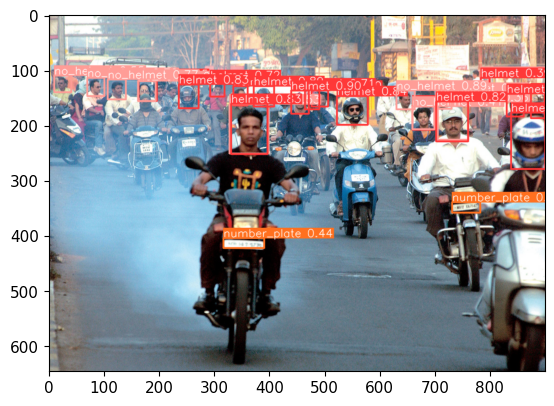

In [27]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()